In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

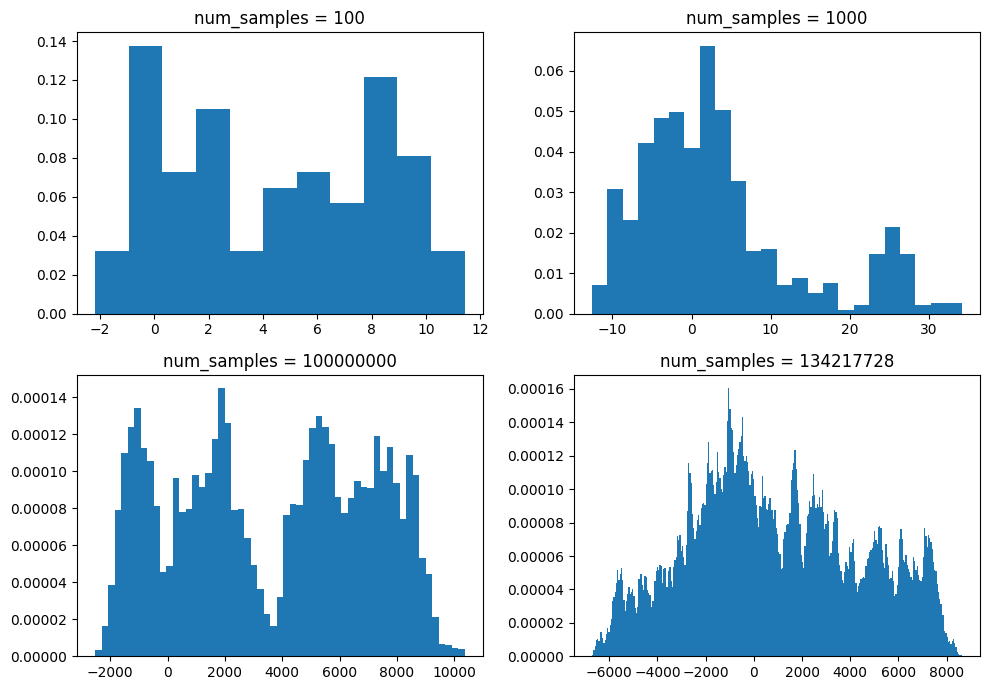

In [25]:
# 우선, 시작하기 앞서 무작위 난수 생성을 여러번 하면 정규 분포의 모양을 따르는지 살펴보겠습니다.
np.random.seed(5)

# 난수 개수 설정
num_samples_list = [10**2, 10**3, 10**8, 8**9]

plt.figure(figsize=(10, 7))

for i, num_samples in enumerate(num_samples_list, 1):
    # 랜덤 워크 생성
    random_walk = np.cumsum(np.random.normal(size=num_samples))

    # 히스토그램 그리기
    plt.subplot(2, 2, i)
    plt.hist(random_walk, bins=(10*i + i**i), density=True)
    plt.title(f'num_samples = {num_samples}')

plt.tight_layout()
plt.show()


- 뭐.. 점점 더 많아지면 대수의 법칙이 이루어질 것으로 추측되긴 합니다.

In [26]:
# 약형 효율적 시장 가설을 만족한다면, 주가는 랜덤워크이기 때문에 주가의 수익률은 정규 분포를 따른다.
df = yf.Tickers(['AAPL', 'TSLA', 'GOOGL', '005930.KS', 'GME'])
df = df.history(period='max')
df

[*********************100%***********************]  5 of 5 completed


Close                                                Dividends  \
           005930.KS        AAPL        GME       GOOGL        TSLA 005930.KS   
Date                                                                            
1980-12-12       NaN    0.099584        NaN         NaN         NaN       NaN   
1980-12-15       NaN    0.094388        NaN         NaN         NaN       NaN   
1980-12-16       NaN    0.087461        NaN         NaN         NaN       NaN   
1980-12-17       NaN    0.089625        NaN         NaN         NaN       NaN   
1980-12-18       NaN    0.092224        NaN         NaN         NaN       NaN   
...              ...         ...        ...         ...         ...       ...   
2023-07-12   71900.0  189.770004  23.440001  118.930000  271.989990       0.0   
2023-07-13   71900.0  190.539993  23.459999  124.540001  277.899994       0.0   
2023-07-14   73400.0  190.690002  22.969999  125.419998  281.380005       0.0   
2023-07-17   73300.0  193.990005  22.820000  124.650002  290.380005       0.0   
2023-07-18   72200.0         NaN        NaN         NaN         NaN       0.0   

                                 ... Stock Splits                       \
           AAPL  GME GOOGL TSLA  ...    005930.KS AAPL  GME GOOGL TSLA   
Date                             ...                                     
1980-12-12  0.0  NaN   NaN  NaN  ...          NaN  0.0  NaN   NaN  NaN   
1980-12-15  0.0  NaN   NaN  NaN  ...          NaN  0.0  NaN   NaN  NaN   
1980-12-16  0.0  NaN   NaN  NaN  ...          NaN  0.0  NaN   NaN  NaN   
1980-12-17  0.0  NaN   NaN  NaN  ...          NaN  0.0  NaN   NaN  NaN   
1980-12-18  0.0  NaN   NaN  NaN  ...          NaN  0.0  NaN   NaN  NaN   
...         ...  ...   ...  ...  ...          ...  ...  ...   ...  ...   
2023-07-12  0.0  0.0   0.0  0.0  ...          0.0  0.0  0.0   0.0  0.0   
2023-07-13  0.0  0.0   0.0  0.0  ...          0.0  0.0  0.0   0.0  0.0   
2023-07-14  0.0  0.0   0.0  0.0  ...          0.0  0.0  0.0   0.0  0.0   
2023-07-17  0.0  0.0   0.0  0.0  ...          0.0  0.0  0.0   0.0  0.0   
2023-07-18  NaN  NaN   NaN  NaN  ...          0.0  NaN  NaN   NaN  NaN   

                Volume                                                   
             005930.KS         AAPL        GME       GOOGL         TSLA  
Date                                                                     
1980-12-12         NaN  469033600.0        NaN         NaN          NaN  
1980-12-15         NaN  175884800.0        NaN         NaN          NaN  
1980-12-16         NaN  105728000.0        NaN         NaN          NaN  
1980-12-17         NaN   86441600.0        NaN         NaN          NaN  
1980-12-18         NaN   73449600.0        NaN         NaN          NaN  
...                ...          ...        ...         ...          ...  
2023-07-12  10375581.0   60750200.0  1742200.0  30404400.0   95672100.0  
2023-07-13  14417279.0   41342300.0  1912200.0  44297900.0  112681500.0  
2023-07-14  15882519.0   41573900.0  2175300.0  33266800.0  119771100.0  
2023-07-17  10060049.0   50437300.0  2026000.0  25679400.0  131106900.0  
2023-07-18   8307055.0          NaN        NaN         NaN          NaN  

[10930 rows x 35 columns]

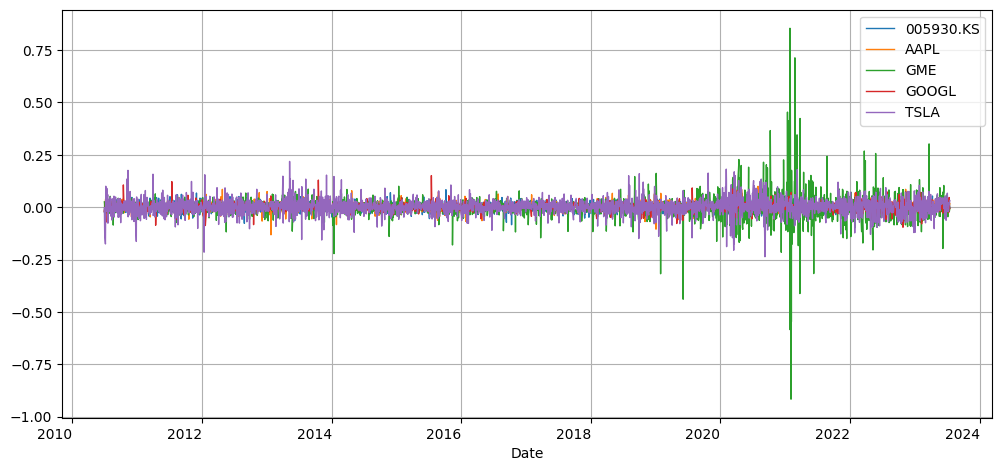

In [27]:
close = df.Close # 종가 기준
daily_rtn = np.log(close.dropna()).diff(1).dropna() # 일별 수익률 계산
daily_rtn.plot(figsize=(12,6), linewidth=1, style='-', rot=0) # 플롯
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

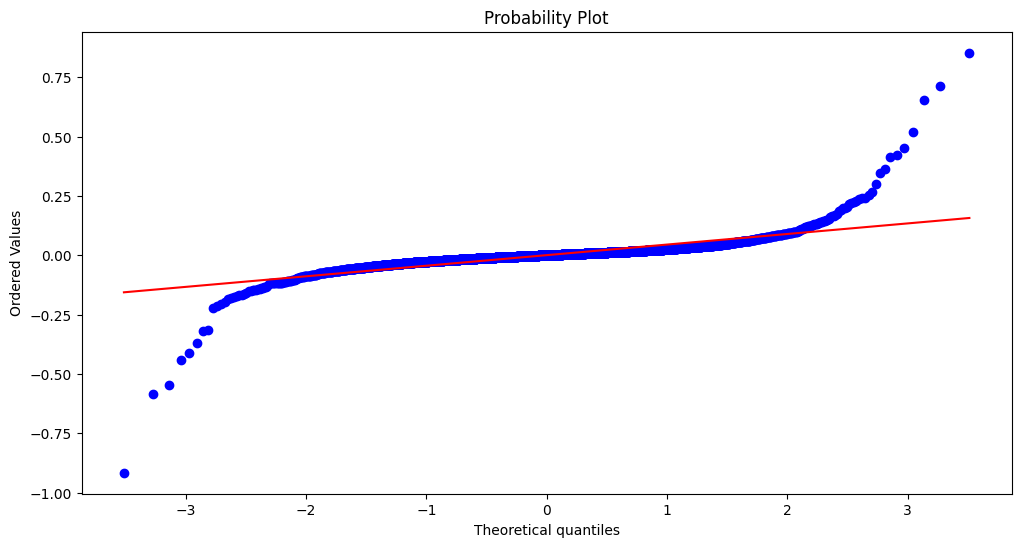

In [28]:
# Q-Q plot
import scipy.stats as stats
plt.figure(figsize=(12,6))
stats.probplot(daily_rtn['GME'], dist = 'norm', plot=plt)
plt.show()

In [29]:
# 정규성을 검증해 보겠습니다.

# K-S Test 스미르노프 Test
ks_stat, p_value = stats.kstest(daily_rtn['AAPL'], 'norm')

if p_value > 0.05:
    print('K-S test: Probably Gaussian')
else:
    print('K-S test: Probably NOT Gaussian')

# Shapiro Test
shapiro_stat, p_value = stats.shapiro(daily_rtn['AAPL'])

if p_value > 0.05:
    print('Shapiro test: Probably Gaussian')
else:
    print('Shapiro test: Probably NOT Gaussian')

# Anderson Test
anderson_results = stats.anderson(daily_rtn['AAPL'], 'norm')

for i in range(len(anderson_results.critical_values)):
    sl, cv = anderson_results.significance_level[i], anderson_results.critical_values[i]
    if anderson_results.statistic < cv:
        print('Significance level: %.1f, Critical value: %.3f: Data looks normal (fail to reject H0)' %(sl, cv))
    else:
        print('Significance level: %.1f, Critical value: %.3f: Data does not look normal (reject H0)' %(sl, cv))

# 어떤 것도 정규성을 띄고 있지 않다.

K-S test: Probably NOT Gaussian
Shapiro test: Probably NOT Gaussian
Significance level: 15.0, Critical value: 0.575: Data does not look normal (reject H0)
Significance level: 10.0, Critical value: 0.655: Data does not look normal (reject H0)
Significance level: 5.0, Critical value: 0.786: Data does not look normal (reject H0)
Significance level: 2.5, Critical value: 0.917: Data does not look normal (reject H0)
Significance level: 1.0, Critical value: 1.091: Data does not look normal (reject H0)


In [30]:
# 그러나 기간을 단기로 정리한다면 어떨까?
df = yf.Tickers(['AAPL', 'TSLA', 'GOOGL', '005930.KS', 'GME', 'SPY'])
df = df.history(start='2022-01-01', end='2022-12-31')
close = df.Close
daily_rtn = np.log(close.dropna()).diff(1).dropna()

[*********************100%***********************]  6 of 6 completed


In [31]:
# 단기의 정규성을 검증해 보겠습니다.

# K-S Test 스미르노프 Test
ks_stat, p_value = stats.kstest(daily_rtn['TSLA'], 'norm')

if p_value > 0.05:
    print('K-S test: Probably Gaussian')
else:
    print('K-S test: Probably NOT Gaussian')

# Shapiro Test
shapiro_stat, p_value = stats.shapiro(daily_rtn['TSLA'])

if p_value > 0.05:
    print('Shapiro test: Probably Gaussian')
else:
    print('Shapiro test: Probably NOT Gaussian')

# Anderson Test
anderson_results = stats.anderson(daily_rtn['TSLA'], 'norm')

print('Test statistic: ', anderson_results.statistic)

for i in range(len(anderson_results.critical_values)):
    sl, cv = anderson_results.significance_level[i], anderson_results.critical_values[i]
    if anderson_results.statistic < cv:
        print('Significance level: %.1f, Critical value: %.3f: Data looks normal (fail to reject H0)' %(sl, cv))
    else:
        print('Significance level: %.1f, Critical value: %.3f: Data does not look normal (reject H0)' %(sl, cv))

# 여러가지 종목으로 테스트 해보자.

K-S test: Probably NOT Gaussian
Shapiro test: Probably NOT Gaussian
Test statistic:  1.1975848122351067
Significance level: 15.0, Critical value: 0.567: Data does not look normal (reject H0)
Significance level: 10.0, Critical value: 0.645: Data does not look normal (reject H0)
Significance level: 5.0, Critical value: 0.774: Data does not look normal (reject H0)
Significance level: 2.5, Critical value: 0.903: Data does not look normal (reject H0)
Significance level: 1.0, Critical value: 1.074: Data does not look normal (reject H0)


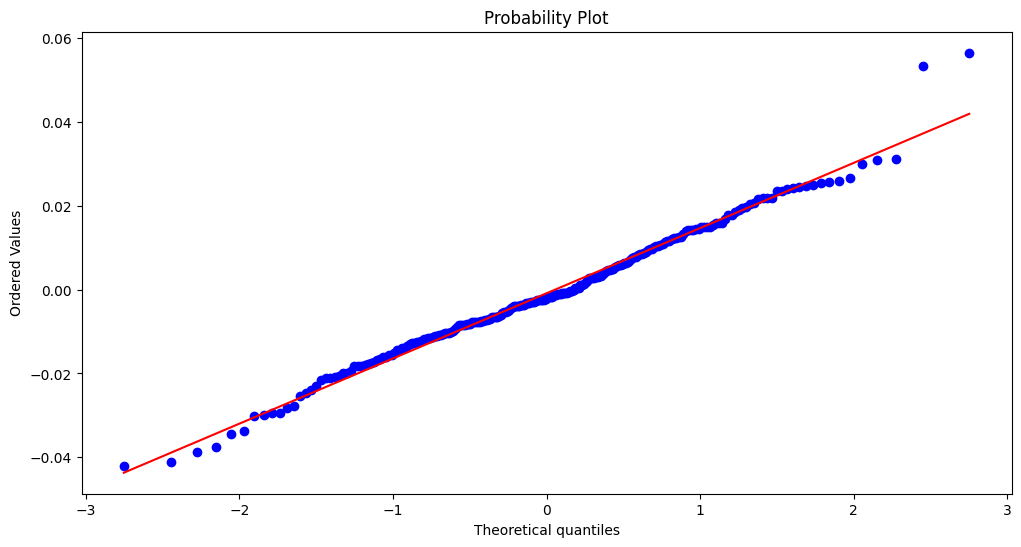

In [32]:
# 단기의 Q-Q plot
plt.figure(figsize=(12,6))
stats.probplot(daily_rtn['SPY'], dist = 'norm', plot=plt)
plt.show()

그렇다면, 주가가 랜덤이고(시장이 효율적이고), 정규 분포를 따른다면.. 기술적 분석을 통한 이익은 얻지 못하는가?  
#### 비교해보자!

In [33]:
def download_stock_data(ticker, start_date=None, end_date=None):
    """주어진 티커에 대한 주식 데이터를 다운로드하고 데이터 프레임을 반환합니다"""
    data = yf.download(ticker, start=start_date, end=end_date, actions=False)
    data.drop(['Close','Open', 'Low', 'High', 'Volume'], inplace=True, axis=1)
    return data

def calculate_daily_volatility(data):
    """주어진 주식 데이터로부터 일일 변동성을 계산합니다"""
    returns = data['Adj Close'].pct_change()
    return returns.std()

def generate_random_walk(start_price, length, daily_vol, seed=None):
    np.random.seed(seed)
    """랜덤 워크 데이터를 생성합니다"""
    random_variation = np.random.normal(0, daily_vol, length)
    prices = start_price * np.cumprod(1 + random_variation)
    return pd.DataFrame(prices, columns=['Random Close'])

[*********************100%***********************]  1 of 1 completed


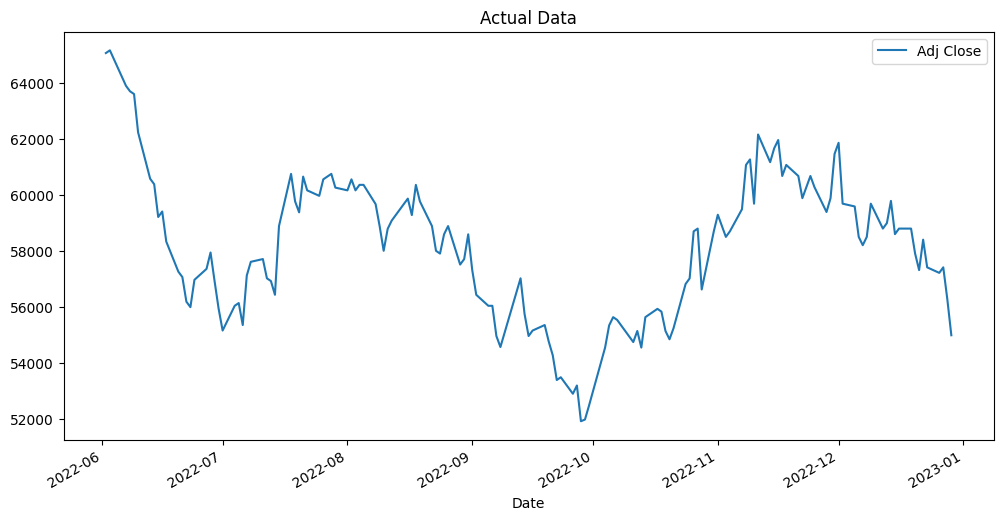

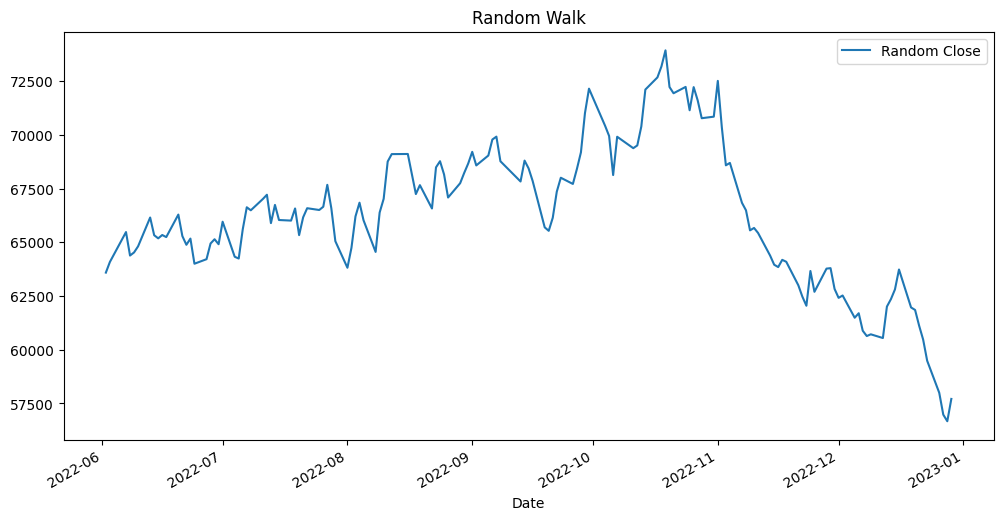

In [34]:
# 주식 데이터를 다운로드합니다
real_data = download_stock_data('005930.KS', '2022-06-01', '2022-12-31')

# 일일 변동성을 계산합니다
daily_vol = calculate_daily_volatility(real_data)

# 무작위 워크 데이터를 생성합니다
rw_data = generate_random_walk(real_data['Adj Close'][0], len(real_data), daily_vol)

# 그래프를 그립니다
real_data.plot(figsize=(12,6), title="Actual Data")
rw_data.index = real_data.index
rw_data.plot(figsize=(12,6), title="Random Walk")
plt.show()

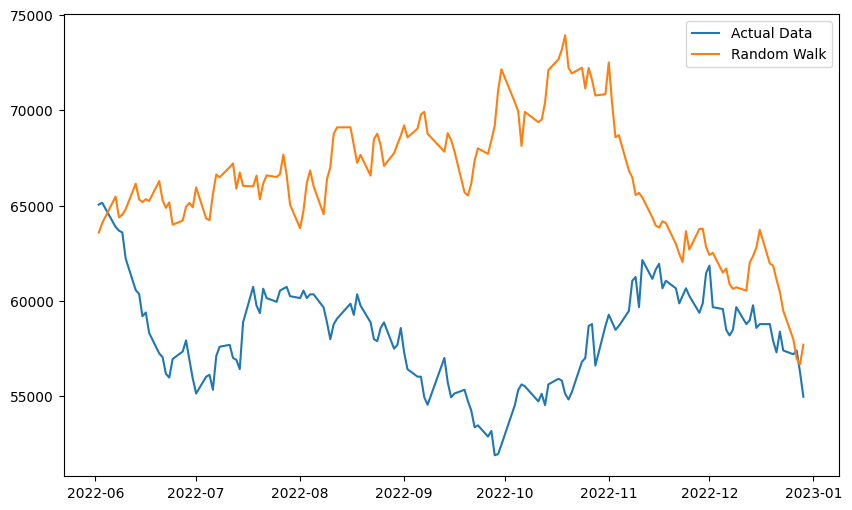

In [35]:
# 두 그래프를 겹쳐 본다면 이런 모형이 되겠죠?
plt.figure(figsize=(10,6))
plt.plot(real_data.index, real_data['Adj Close'], label='Actual Data')
plt.plot(rw_data.index, rw_data['Random Close'], label='Random Walk')
plt.legend()
plt.show()

RSI 를 통해 기술적 투자를 해보자. 만약 효율적이라면 수익을 전혀 낼 수 없어야 한다. 단 한 번이라도.

In [36]:
# 각 data의 rsi를 계산하기 위함.
real_delta = real_data.diff()
rw_delta = rw_data.diff()

In [37]:
# rsi를 계산하기 위해 하락한 날, 상승한 날을 분리해야 한다.
real_ups, real_downs = real_delta.copy(), real_delta.copy()
real_ups[real_ups < 0] = 0
real_downs[real_downs > 0] = 0

In [38]:
# RS(Relative Strength) 계산
# AU, AD (상승 및 하락 평균) 계산

# 기간
period = 14 #default:14로 많이 씀

real_au = real_ups.ewm(com=period-1, min_periods=period).mean()#.dropna() # com=비율, min_periods = 최소관측기간, period 만큼
real_ad = real_downs.abs().ewm(com=period-1, min_periods=period).mean()#.dropna()

real_RS = real_au/real_ad
real_RSI = pd.Series(100 - (100/(1+real_RS['Adj Close'])))

real_RSI

Date
2022-06-02          NaN
2022-06-03          NaN
2022-06-07          NaN
2022-06-08          NaN
2022-06-09          NaN
                ...    
2022-12-23    42.250616
2022-12-26    41.402842
2022-12-27    42.642277
2022-12-28    37.718627
2022-12-29    33.030809
Name: Adj Close, Length: 145, dtype: float64

In [39]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xaavf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-07-18 05:22:03--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-07-18 05:22:04--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-07-18 05:22:04--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [40]:
# "한방에 해결"
from talib import RSI
RSI(real_data['Adj Close'])

Date
2022-06-02          NaN
2022-06-03          NaN
2022-06-07          NaN
2022-06-08          NaN
2022-06-09          NaN
                ...    
2022-12-23    42.249462
2022-12-26    41.401736
2022-12-27    42.641158
2022-12-28    37.717761
2022-12-29    33.030154
Length: 145, dtype: float64

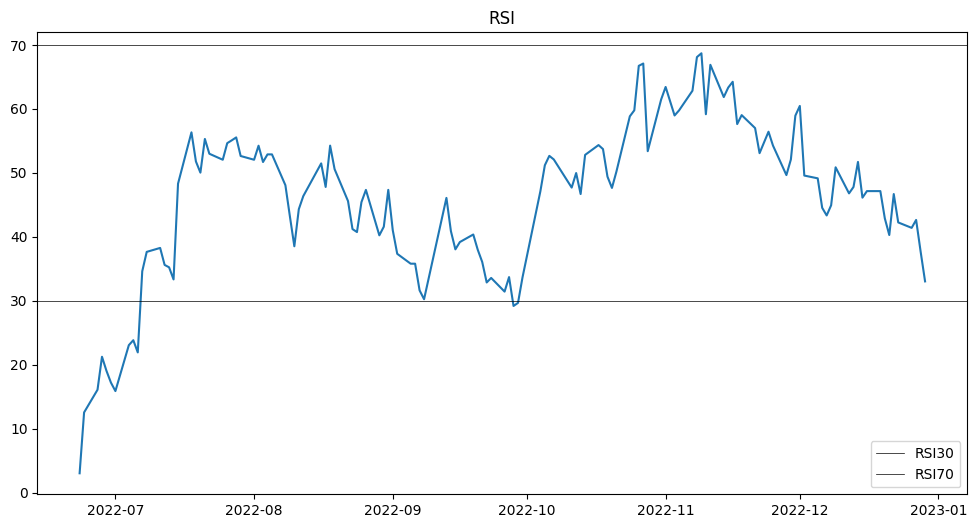

In [41]:
plt.figure(figsize=(12,6))
plt.title('RSI')
plt.plot(RSI(real_data['Adj Close']))
for line in [30,70]:
    plt.axhline(line, color='k', linewidth=0.5, label=f'RSI{line}')
plt.legend()
plt.show()

In [42]:
# 시그널링 record
real_data['RSI']=real_RSI.values

real_data['Buy signal'] = np.where(real_data['RSI'] < 30, 1, 0)
real_data['Sell signal'] = np.where(real_data['RSI'] > 70, -1, 0)

# 이전에 거래 기록이 있어야 거래될 수 있도록 조정
real_data['Buy Trading'] = 0
real_data['Sell Trading'] = 0
holding_stock = False

In [43]:
for i in range(len(real_data)):
    if real_data['RSI'].iloc[i] < 30 and not holding_stock:
        real_data['Buy Trading'].iloc[i] = 1
        holding_stock = True
    elif real_data['RSI'].iloc[i] > 70 and holding_stock:
        real_data['Sell Trading'].iloc[i] = -1
        holding_stock = False

real_data['return'] = real_data['Adj Close'].pct_change() * real_data['Buy Trading'].shift()
real_data['return'].iloc[0] = 0
real_data['value'] = (1 + real_data['return']).cumprod() * 100_000

real_data

,Adj Close,RSI,Buy signal,Sell signal,Buy Trading,Sell Trading,return,value
Date,,,,,,,,
2022-06-02,65056.378906,NaN,0,0,0,0,0.0,100000.000000
2022-06-03,65153.921875,NaN,0,0,0,0,0.0,100000.000000
2022-06-07,63885.953125,NaN,0,0,0,0,-0.0,100000.000000
2022-06-08,63690.878906,NaN,0,0,0,0,-0.0,100000.000000
2022-06-09,63593.343750,NaN,0,0,0,0,-0.0,100000.000000
...,...,...,...,...,...,...,...,...
2022-12-23,57406.562500,42.250616,0,0,0,0,-0.0,101742.162564
2022-12-26,57208.949219,41.402842,0,0,0,0,-0.0,101742.162564
2022-12-27,57406.562500,42.642277,0,0,0,0,0.0,101742.162564


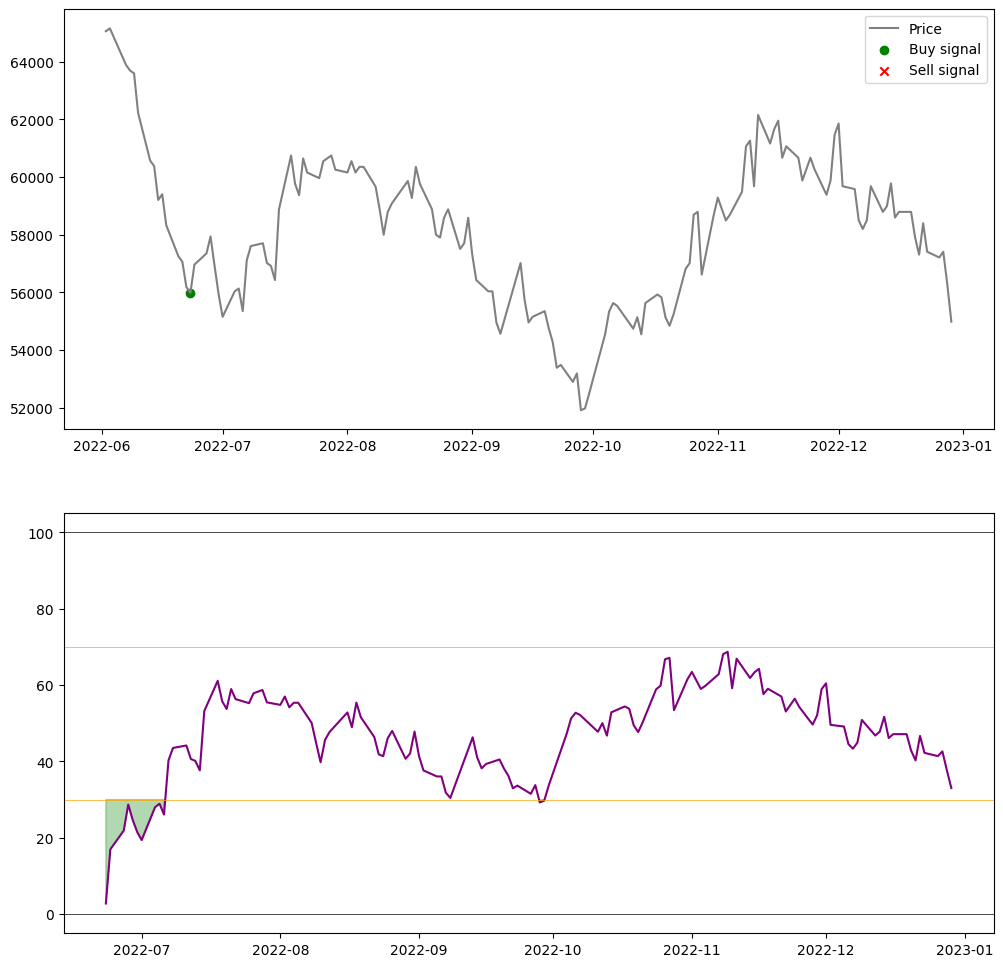

In [44]:
fig, axs = plt.subplots(2, figsize=(12,12))

axs[0].plot(real_data.index, real_data['Adj Close'], label = 'Price', color='grey')
axs[0].scatter(real_data.loc[real_data['Buy Trading']==1].index, real_data.loc[real_data['Buy Trading']==1, 'Adj Close'],
               color='g', marker='o', label = 'Buy signal')
axs[0].scatter(real_data.loc[real_data['Sell Trading']==-1].index, real_data.loc[real_data['Sell Trading']==-1, 'Adj Close'],
               color='r', marker='x', label = 'Sell signal')
axs[0].legend()


axs[1].plot(real_data.index, real_data['RSI'], label = 'RSI', color='purple')
for line in [30,70]:
    axs[1].axhline(line, color='orange', linewidth=0.5, label=f'RSI = {line}')
for line in [0,100]:
    axs[1].axhline(line, color='k', linewidth=0.5, label=f'RSI = {line}')
axs[1].fill_between(real_data.index, real_data['RSI'], 30, where=(real_data['RSI'] <= 30), color='g', alpha=0.3, interpolate = False)
axs[1].fill_between(real_data.index, real_data['RSI'], 70, where=(real_data['RSI'] >= 70), color='r', alpha=0.3, interpolate = False)

plt.show()

In [45]:
real_rtn = real_data['value'].iloc[-1] - 100_000
real_rtnpct = (real_data['value'].iloc[-1]/100_000 - 1) * 100
print(f"실제 데이터 총 수익: $ {real_rtn.round(2)}, 수익률: {real_rtnpct.round(2)}%")

실제 데이터 총 수익: $ 1742.16, 수익률: 1.74%


In [46]:
rw_delta = rw_data.diff()
rw_ups, rw_downs = rw_delta.copy(), rw_delta.copy()
rw_ups[rw_ups < 0] = 0
rw_downs[rw_downs > 0] = 0
period = 14

rw_au = rw_ups.ewm(com=period-1, min_periods=period).mean()# com=비율, min_periods = 최소관측기간, period 만큼
rw_ad = rw_downs.abs().ewm(com=period-1, min_periods=period).mean()

rw_RS = rw_au/rw_ad
rw_RSI = pd.Series(100 - (100/(1+rw_RS['Random Close'])))

rw_data['RSI']=rw_RSI.values

rw_data['Buy signal'] = np.where(rw_data['RSI'] < 30, 1, 0)
rw_data['Sell signal'] = np.where(rw_data['RSI'] > 70, -1, 0)

rw_data['Buy Trading'] = 0
rw_data['Sell Trading'] = 0
holding_stock = False

for i in range(len(rw_data)):
    if rw_data['RSI'].iloc[i] < 30 and not holding_stock:
        rw_data['Buy Trading'].iloc[i] = 1
        holding_stock = True
    elif rw_data['RSI'].iloc[i] > 70 and holding_stock:
        rw_data['Sell Trading'].iloc[i] = -1
        holding_stock = False

rw_data['return'] = rw_data['Random Close'].pct_change() * rw_data['Buy Trading'].shift()
rw_data['return'].iloc[0] = 0
rw_data['value'] = (1 + rw_data['return']).cumprod() * 100_000

rw_data

,Random Close,RSI,Buy signal,Sell signal,Buy Trading,Sell Trading,return,value
Date,,,,,,,,
2022-06-02,63590.256489,NaN,0,0,0,0,0.0,100000.000000
2022-06-03,64086.382442,NaN,0,0,0,0,0.0,100000.000000
2022-06-07,65477.563561,NaN,0,0,0,0,0.0,100000.000000
2022-06-08,64384.521803,NaN,0,0,0,0,-0.0,100000.000000
2022-06-09,64528.970536,NaN,0,0,0,0,0.0,100000.000000
...,...,...,...,...,...,...,...,...
2022-12-23,59489.379032,32.732482,0,0,0,0,-0.0,99828.498014
2022-12-26,57997.076581,28.111402,1,0,0,0,-0.0,99828.498014
2022-12-27,56981.040270,25.474427,1,0,0,0,-0.0,99828.498014


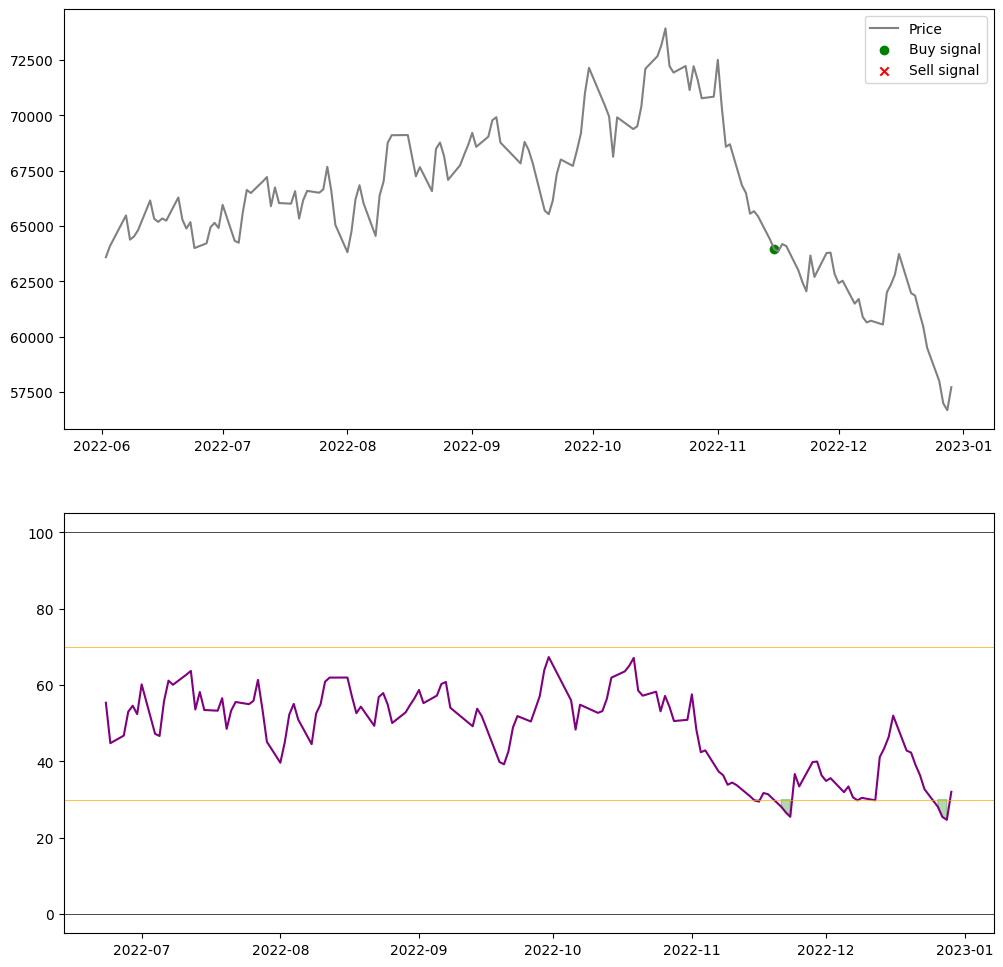

In [47]:
fig, axs = plt.subplots(2, figsize=(12,12))

axs[0].plot(rw_data.index, rw_data['Random Close'], label = 'Price', color='grey')
axs[0].scatter(rw_data.loc[rw_data['Buy Trading']==1].index, rw_data.loc[rw_data['Buy Trading']==1, 'Random Close'],
               color='g', marker='o', label = 'Buy signal')
axs[0].scatter(rw_data.loc[rw_data['Sell Trading']==-1].index, rw_data.loc[rw_data['Sell Trading']==-1, 'Random Close'],
               color='r', marker='x', label = 'Sell signal')
axs[0].legend()


axs[1].plot(rw_data.index, rw_data['RSI'], label = 'RSI', color='purple')
for line in [30,70]:
    axs[1].axhline(line, color='orange', linewidth=0.5, label=f'RSI = {line}')
for line in [0,100]:
    axs[1].axhline(line, color='k', linewidth=0.5, label=f'RSI = {line}')
axs[1].fill_between(rw_data.index, rw_data['RSI'], 30, where=(rw_data['RSI'] <= 30), color='g', alpha=0.3, interpolate = False)
axs[1].fill_between(rw_data.index, rw_data['RSI'], 70, where=(rw_data['RSI'] >= 70), color='r', alpha=0.3, interpolate = False)

plt.show()

In [48]:
rw_rtn = rw_data['value'].iloc[-1] - 100_000
rw_rtnpct = (rw_data['value'].iloc[-1]/100_000 - 1) * 100
print(f"랜덤 데이터 총 수익: $ {rw_rtn.round(2)}, 수익률: {rw_rtnpct.round(2)}%")

랜덤 데이터 총 수익: $ -171.5, 수익률: -0.17%


In [49]:
real_rtn = real_data['value'].iloc[-1] - 100_000
real_rtnpct = (real_data['value'].iloc[-1]/100_000 - 1) * 100
print(f"실제 데이터 총 수익: $ {real_rtn.round(2)}, 수익률: {real_rtnpct.round(2)}%")
rw_rtn = rw_data['value'].iloc[-1] - 100_000
rw_rtnpct = (rw_data['value'].iloc[-1]/100_000 - 1) * 100
print(f"랜덤 데이터 총 수익: $ {rw_rtn.round(2)}, 수익률: {rw_rtnpct.round(2)}%")

실제 데이터 총 수익: $ 1742.16, 수익률: 1.74%
랜덤 데이터 총 수익: $ -171.5, 수익률: -0.17%


In [50]:
# 여러번 반복 시뮬레이션 하기 위해서, GPT에게 리팩토링 좀 시켰어요.

def calculate_and_execute_strategy(ticker, start_date=None, end_date=None):
    import yfinance as yf
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Download stock data
    data = yf.download(ticker, start=start_date, end=end_date)
    data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

    # Calculate daily return and RSI
    delta = data.diff()
    ups, downs = delta.copy(), delta.copy()
    ups[ups < 0] = 0
    downs[downs > 0] = 0
    AU = ups.ewm(com=13, min_periods=14).mean()
    AD = downs.abs().ewm(com=13, min_periods=14).mean()
    RS = AU / AD
    data['RSI'] = 100 - (100 / (1 + RS))

    # Generate buy and sell signals
    data['Buy_Signal'] = np.where(data['RSI'] < 30, 1, 0)
    data['Sell_Signal'] = np.where(data['RSI'] > 70, -1, 0)

    # Adjust the buy/sell signals to only sell if we previously bought
    data['Buy_Trade'] = 0
    data['Sell_Trade'] = 0
    holding_stock = False
    for i in range(len(data)):
        if data['Buy_Signal'].iloc[i] == 1 and not holding_stock:
            data['Buy_Trade'].iloc[i] = 1
            holding_stock = True
        elif data['Sell_Signal'].iloc[i] == -1 and holding_stock:
            data['Sell_Trade'].iloc[i] = -1
            holding_stock = False

    # Calculate returns and portfolio value
    data['Return'] = data['Adj Close'].pct_change() * data['Buy_Trade'].shift()
    data['Return'].iloc[0] = 0
    data['Portfolio_Value'] = (1 + data['Return']).cumprod() * 100000

    # Plot
    fig, axs = plt.subplots(2, figsize=(12,12))

    for date in data.resample('W').mean().index:
        axs[0].axvline(date, color='gray', linestyle='--', linewidth=0.5)
        axs[1].axvline(date, color='gray', linestyle='--', linewidth=0.5)

    axs[0].plot(data.index, data['Adj Close'], label='Price')
    axs[0].scatter(data.loc[data['Buy_Trade']==1].index, data.loc[data['Buy_Trade']==1, 'Adj Close'], color='g', marker='o', label='Buy Signal')
    axs[0].scatter(data.loc[data['Sell_Trade']==-1].index, data.loc[data['Sell_Trade']==-1, 'Adj Close'], color='r', marker='x', label='Sell Signal')
    axs[0].legend()

    axs[1].plot(data.index, data['RSI'], label='RSI')
    axs[1].axhline(30, color='orange', linewidth=0.6)
    axs[1].axhline(70, color='orange', linewidth=0.6)
    axs[1].fill_between(data.index, data['RSI'], 30, where=(data['RSI'] <= 30), color='green', alpha=0.3, interpolate=True)
    axs[1].fill_between(data.index, data['RSI'], 70, where=(data['RSI'] >= 70), color='red', alpha=0.3, interpolate=True)
    axs[1].legend()

    plt.show()

    total_return = data['Portfolio_Value'].iloc[-1] - 100000
    return_percentage = (data['Portfolio_Value'].iloc[-1] / 100000 - 1) * 100

    return total_return.round(2), return_percentage.round(2)


[*********************100%***********************]  1 of 1 completed


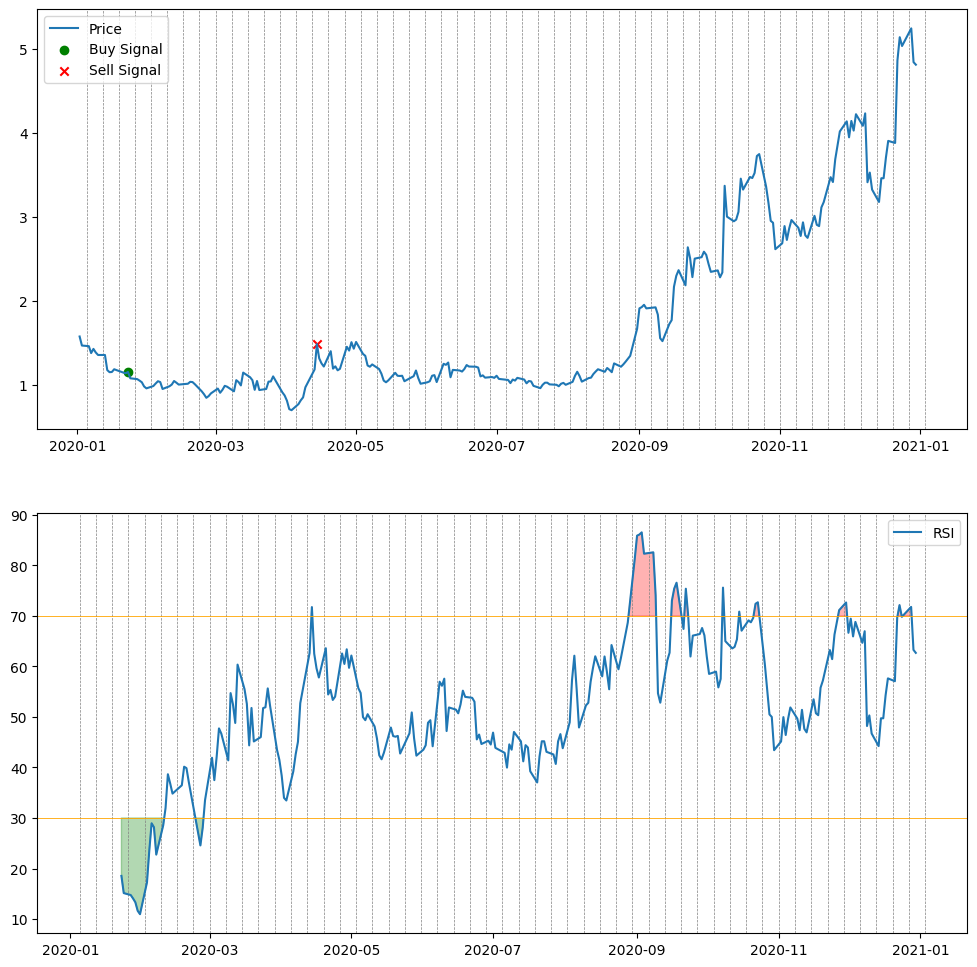

(-6493.5, -6.49)

In [51]:
calculate_and_execute_strategy('GME', '2020-01-01', '2020-12-31')

In [52]:
# plot 출력
def simulate_random_walk_strategy(ticker, start_date, end_date, seed=None):
    import yfinance as yf
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Download stock data
    data = yf.download(ticker, start=start_date, end=end_date)
    data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

    # Calculate daily volatility
    daily_vol = data['Adj Close'].pct_change().std()

    # Generate random walk data
    rw_data = pd.DataFrame(data['Adj Close'][0] * np.cumprod(1 + np.random.normal(0, daily_vol, len(data))), columns=['Adj Close'])
    rw_data.index = data.index

    # Calculate RSI
    delta = rw_data.diff()
    ups, downs = delta.copy(), delta.copy()
    ups[ups < 0] = 0
    downs[downs > 0] = 0
    AU = ups.ewm(com=13, min_periods=14).mean()
    AD = downs.abs().ewm(com=13, min_periods=14).mean()
    RS = AU / AD
    rw_data['RSI'] = 100 - (100 / (1 + RS))

    # Generate buy and sell signals
    rw_data['Buy_Signal'] = np.where(rw_data['RSI'] < 30, 1, 0)
    rw_data['Sell_Signal'] = np.where(rw_data['RSI'] > 70, -1, 0)

    # Adjust the buy/sell signals to only sell if we previously bought
    rw_data['Buy_Trade'] = 0
    rw_data['Sell_Trade'] = 0
    holding_stock = False
    for i in range(len(rw_data)):
        if rw_data['RSI'].iloc[i] < 30 and not holding_stock:
            rw_data['Buy_Trade'].iloc[i] = 1
            holding_stock = True
        elif rw_data['RSI'].iloc[i] > 70 and holding_stock:
            rw_data['Sell_Trade'].iloc[i] = -1
            holding_stock = False

    # Calculate returns and portfolio value
    rw_data['Return'] = rw_data['Adj Close'].pct_change() * rw_data['Buy_Trade'].shift()
    rw_data['Return'].iloc[0] = 0
    rw_data['Portfolio_Value'] = (1 + rw_data['Return']).cumprod() * 100000

    # Plot
    fig, axs = plt.subplots(2, figsize=(12,12))
    for date in data.resample('W').mean().index:
        axs[0].axvline(date, color='gray', linestyle='--', linewidth=0.5)
        axs[1].axvline(date, color='gray', linestyle='--', linewidth=0.5)
    axs[0].plot(rw_data.index, rw_data['Adj Close'], label='Price')
    axs[0].scatter(rw_data.loc[rw_data['Buy_Trade']==1].index, rw_data.loc[rw_data['Buy_Trade']==1, 'Adj Close'], color='g', marker='o', label='Buy Signal')
    axs[0].scatter(rw_data.loc[rw_data['Sell_Trade']==-1].index, rw_data.loc[rw_data['Sell_Trade']==-1, 'Adj Close'], color='r', marker='x', label='Sell Signal')
    axs[0].legend()

    axs[1].plot(rw_data.index, rw_data['RSI'], label='RSI')
    axs[1].axhline(30, color='orange', linewidth=0.6)
    axs[1].axhline(70, color='orange', linewidth=0.6)
    axs[1].fill_between(rw_data.index, rw_data['RSI'], 30, where=(rw_data['RSI'] <= 30), color='green', alpha=0.3, interpolate=True)
    axs[1].fill_between(rw_data.index, rw_data['RSI'], 70, where=(rw_data['RSI'] >= 70), color='red', alpha=0.3, interpolate=True)
    axs[1].legend()

    plt.show()

    total_return = rw_data['Portfolio_Value'].iloc[-1] - 100000
    return_percentage = (rw_data['Portfolio_Value'].iloc[-1] / 100000 - 1) * 100

    print(f"Total return: $ {total_return}, Return percentage: {return_percentage}%")

    return total_return, return_percentage


[*********************100%***********************]  1 of 1 completed


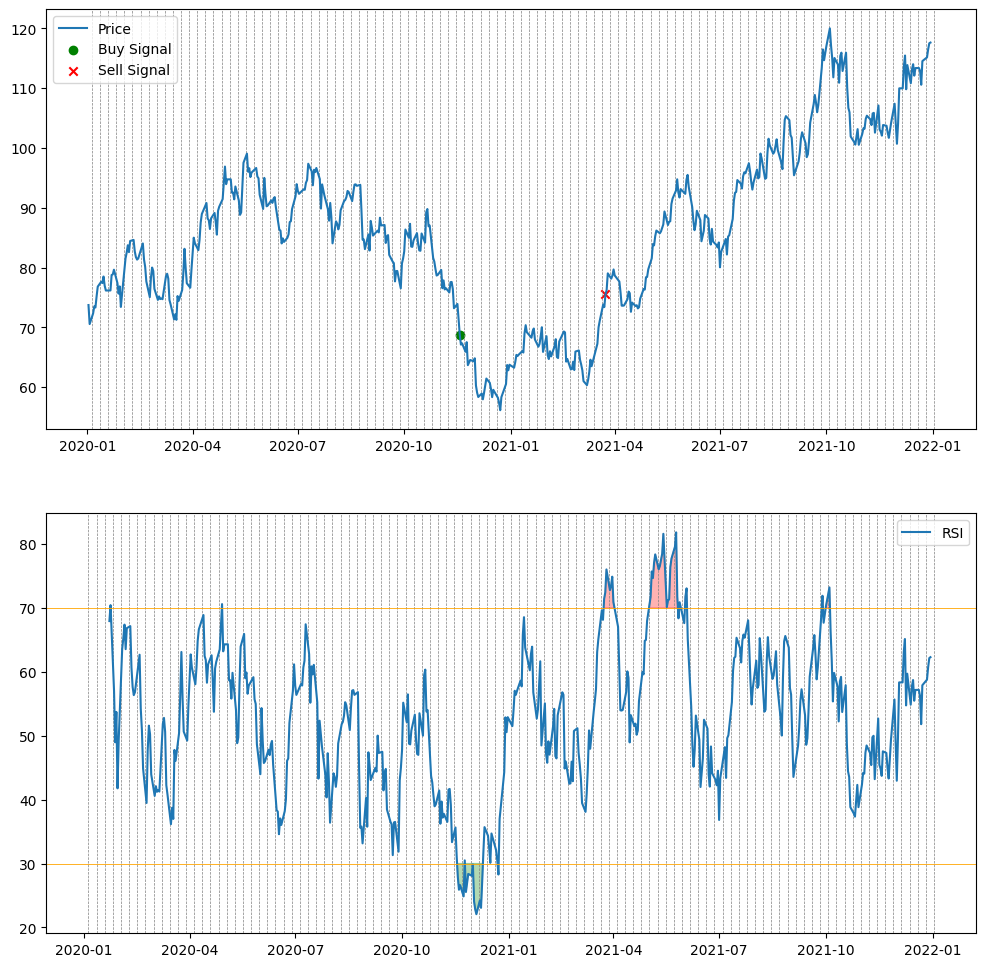

Total return: $ -2408.088735731013, Return percentage: -2.4080887357310177%


(-2408.088735731013, -2.4080887357310177)

In [53]:
simulate_random_walk_strategy('AAPL', '2020-01-01', '2021-12-31')

In [54]:
# plot 출력 안함
def N_simulate_random_walk_strategy(ticker, start_date, end_date, seed=None):
    import yfinance as yf
    import numpy as np
    import pandas as pd

    # Download stock data
    data = yf.download(ticker, start=start_date, end=end_date)
    data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

    # Calculate daily volatility
    daily_vol = data['Adj Close'].pct_change().std()

    # Generate random walk data
    rw_data = pd.DataFrame(data['Adj Close'][0] * np.cumprod(1 + np.random.normal(0, daily_vol, len(data))), columns=['Adj Close'])
    rw_data.index = data.index

    # Calculate RSI
    delta = rw_data.diff()
    ups, downs = delta.copy(), delta.copy()
    ups[ups < 0] = 0
    downs[downs > 0] = 0
    AU = ups.ewm(com=13, min_periods=14).mean()
    AD = downs.abs().ewm(com=13, min_periods=14).mean()
    RS = AU / AD
    rw_data['RSI'] = 100 - (100 / (1 + RS))

    # Generate buy and sell signals
    rw_data['Buy_Signal'] = np.where(rw_data['RSI'] < 30, 1, 0)
    rw_data['Sell_Signal'] = np.where(rw_data['RSI'] > 70, -1, 0)

    # Adjust the buy/sell signals to only sell if we previously bought
    rw_data['Buy_Trade'] = 0
    rw_data['Sell_Trade'] = 0
    holding_stock = False
    for i in range(len(rw_data)):
        if rw_data['RSI'].iloc[i] < 30 and not holding_stock:
            rw_data['Buy_Trade'].iloc[i] = 1
            holding_stock = True
        elif rw_data['RSI'].iloc[i] > 70 and holding_stock:
            rw_data['Sell_Trade'].iloc[i] = -1
            holding_stock = False

    # Calculate returns and portfolio value
    rw_data['Return'] = rw_data['Adj Close'].pct_change() * rw_data['Buy_Trade'].shift()
    rw_data['Return'].iloc[0] = 0
    rw_data['Portfolio_Value'] = (1 + rw_data['Return']).cumprod() * 100000

    total_return = rw_data['Portfolio_Value'].iloc[-1] - 100000
    return_percentage = (rw_data['Portfolio_Value'].iloc[-1] / 100000 - 1) * 100

    return total_return, return_percentage


In [55]:
def simulate_multiple_times(ticker, start_date, end_date, num_simulations):
    records = []
    for i in range(num_simulations):
        total_return, _ = N_simulate_random_walk_strategy(ticker, start_date, end_date, seed=i)
        records.append(total_return)
        print(f"iterations: {i+1} time(s).")
    return records


In [56]:
n_iteration = 50
records = simulate_multiple_times('AAPL', '2018-01-01', '2021-12-31', n_iteration)
np.mean(records)

[*********************100%***********************]  1 of 1 completed
iterations: 1 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 2 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 3 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 4 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 5 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 6 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 7 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 8 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 9 time(s).
[*********************100%***********************]  1 of 1 completed
iterations: 10 time(s).
[*********************100%***********************]  1 of 1 completed
iterations

42.317653076825955

[*********************100%***********************]  1 of 1 completed


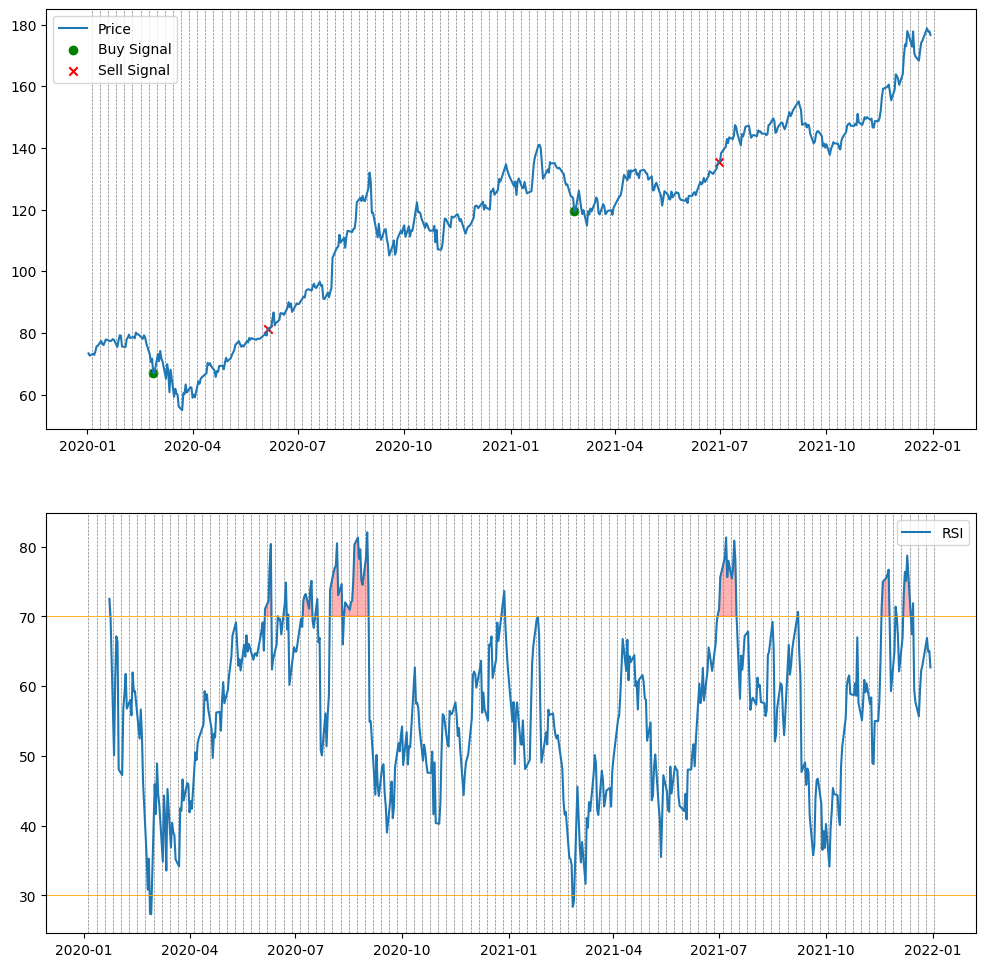

 50.0 %로 현실보다 높은 수익이 나왔습니다.


In [57]:
real_rtn = calculate_and_execute_strategy('AAPL', '2020-01-01', '2021-12-31')[0]
excess_num = list(filter(lambda x: x>real_rtn, records))
print(f' {(len(excess_num) / n_iteration) * 100} %로 현실보다 높은 수익이 나왔습니다.')

# 이동평균선

[*********************100%***********************]  1 of 1 completed


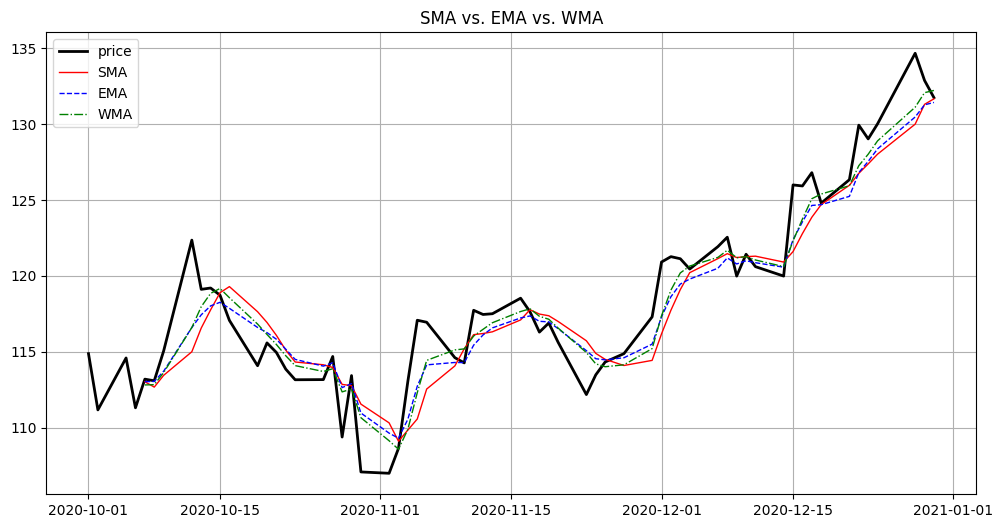

In [58]:
# 비교해봅시다.
example = yf.download("AAPL", start="2020-10-01", end="2020-12-31")

from talib import SMA, EMA, WMA
# 혹은
# from ta.utils import _sma, _ema # wma 지원 x

plt.figure(figsize=(12,6))
plt.title('SMA vs. EMA vs. WMA')
plt.plot(example['Adj Close'], linewidth=2, color='k', label='price')
plt.plot(SMA(example['Adj Close'], 5), linewidth=1, color='r', label = 'SMA')
plt.plot(EMA(example['Adj Close'], 5), linewidth=1, color='b', label = 'EMA', linestyle = '--')
plt.plot(WMA(example['Adj Close'], 5), linewidth=1, color='g', label = 'WMA', linestyle = '-.')
plt.grid()
plt.legend()
plt.show()
# EMA가 조금 더 추세에 민감하게 반응한다.

# Efficient Frontier / Markowitz
- 우리는 분산 투자를 왜 할까요?
- Markowitz의 포트폴리오 이론과 효율적 투자 경계선에 대해 알아보겠습니다.

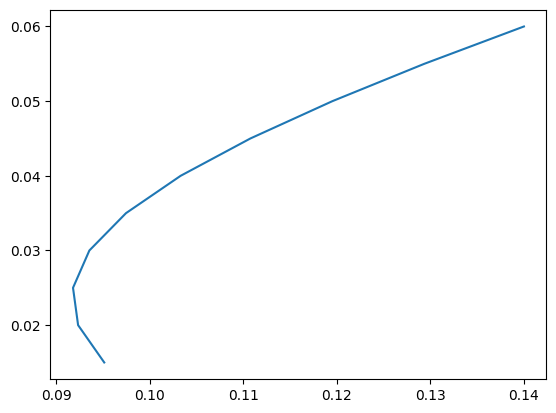

In [59]:
# 포트폴리오 a와 b 구성

a_er = 0.01
a_vol = 0.1

b_er = 0.06
b_vol = 0.14

cor = 0.3

p_er = []
p_vol = []

for w in np.arange(0,1,0.1):
    a_w = w
    b_w = 1-w

    p_er.append(a_w * a_er + b_w * b_er)
    p_vol.append(np.sqrt((a_vol ** 2) * (a_w ** 2) + (b_vol ** 2) * (b_w ** 2) + 2 * a_w * b_w * a_vol * b_vol * cor))

plt.plot(p_vol, p_er)
plt.show()

- 생략했지만, 해당 그래프는 포트폴리오 간 상관성이 1에 가까울수록 직선, -1에 가까울수록 삼각형 모양이 됩니다.
- 0일 때 이상적인 효율적 투자선이 나옵니다.

![image.png](attachment:image.png)

In [60]:
stocklist = ['AAPL', 'TSLA', 'GOOGL', 'SPY', 'IBM', 'GME', 'GOLD', 'BTC']
stocklist2 = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
stocks = yf.Tickers(stocklist)
data = stocks.history(actions=False, start="2018-01-01", end="2020-12-31")['Close']
data

[*********************100%***********************]  8 of 8 completed


,AAPL,BTC,GME,GOLD,GOOGL,IBM,SPY,TSLA
Date,,,,,,,,
2018-01-02,40.831596,NaN,3.988465,13.444442,53.660500,113.086700,244.918594,21.368668
2018-01-03,40.824471,NaN,3.975359,13.267541,54.576000,116.195229,246.467789,21.150000
2018-01-04,41.014103,NaN,4.001569,13.294077,54.787998,118.548592,247.506592,20.974667
2018-01-05,41.481064,NaN,4.080204,13.223316,55.514500,119.127785,249.156021,21.105333
2018-01-08,41.326988,NaN,4.200338,13.037570,55.710499,119.846275,249.611694,22.427334
...,...,...,...,...,...,...,...,...
2020-12-23,129.030823,99.990097,5.142500,20.941935,86.411499,104.716522,354.270935,215.326660
2020-12-24,130.025925,100.026703,5.037500,21.006145,86.708000,105.384216,355.649170,220.589996
2020-12-28,134.676392,100.063004,5.247500,20.951107,88.697998,105.494080,358.704529,221.229996


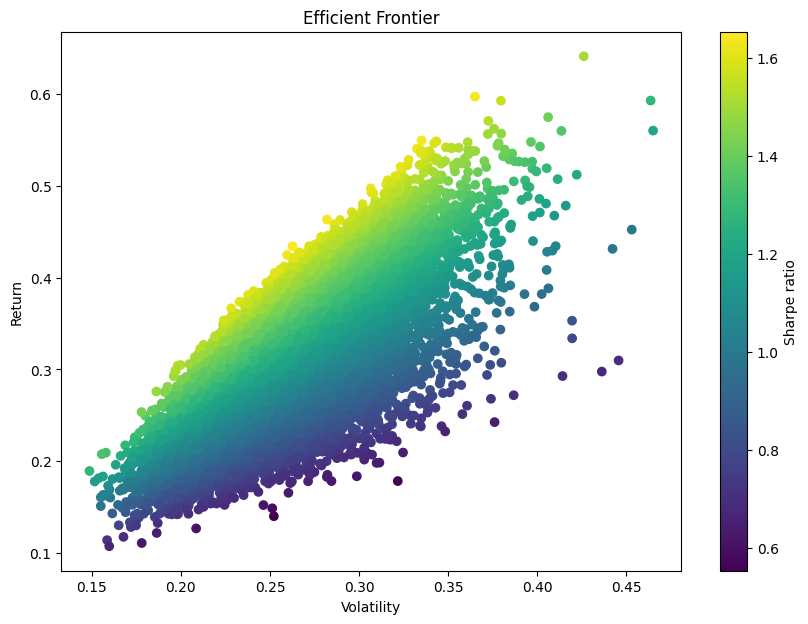

In [61]:
# 일간 수익률
rtns = data.pct_change()

# 연간 수익률 계산
mean_rtns = rtns.mean() * 252

# 공분산 행렬 계산
cov_matrix = rtns.cov() * 252

# 초기 투자 비중 설정
n_assets = len(stocklist)
num_portfolios = 20000
wt = np.zeros((num_portfolios, n_assets))

# 시뮬레이션을 통한 Efficient Frontier 도출
for i in range(num_portfolios):
    w = np.random.random(n_assets)
    w /= np.sum(w)
    wt[i, :] = w

p_rtns = np.sum(mean_rtns[None, :] * wt, axis=1)
p_vol = np.sqrt(np.diag(wt @ cov_matrix @ wt.T))

# Efficient Frontier 그래프 그리기
plt.figure(figsize=(10, 7))
plt.scatter(p_vol, p_rtns, c=p_rtns/p_vol)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

(                AAPL       BTC       GME      GOLD     GOOGL       IBM  \
 Date                                                                     
 2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
 2018-01-03 -0.000175       NaN -0.003286 -0.013158  0.017061  0.027488   
 2018-01-04  0.004645       NaN  0.006593  0.002000  0.003884  0.020254   
 2018-01-05  0.011385       NaN  0.019651 -0.005323  0.013260  0.004886   
 2018-01-08 -0.003714       NaN  0.029443 -0.014047  0.003531  0.006031   
 ...              ...       ...       ...       ...       ...       ...   
 2020-12-23 -0.006976 -0.000399  0.057040  0.013766  0.004656  0.002346   
 2020-12-24  0.007712  0.000366 -0.020418  0.003066  0.003431  0.006376   
 2020-12-28  0.035766  0.000363  0.041687 -0.002620  0.022951  0.001043   
 2020-12-29 -0.013315  0.000020 -0.076703  0.003065 -0.009132 -0.008172   
 2020-12-30 -0.008527  0.000396 -0.006192  0.014405 -0.012237  0.004362   
 
                  SPY  

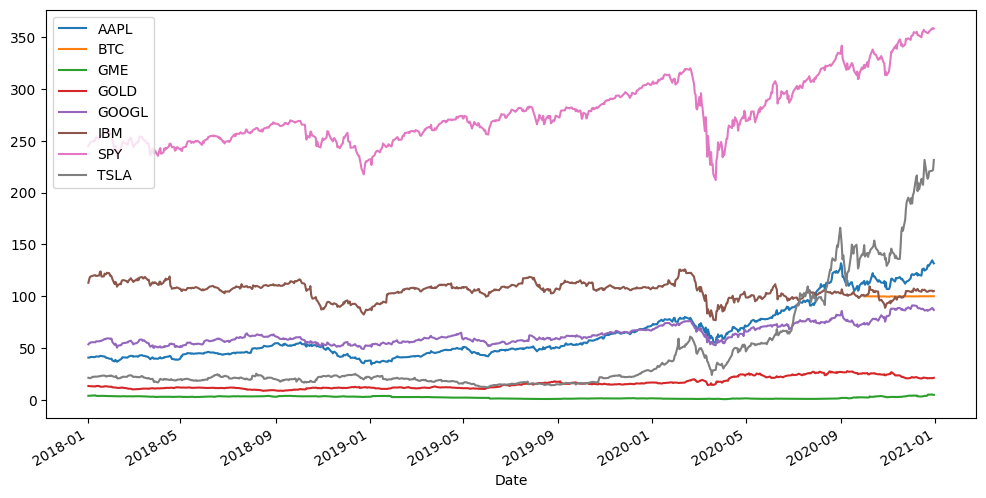

In [62]:
# 마코위츠
# 데이터 그대로 사용 예정
data.plot(figsize=(12,6))
rtns, mean_rtns, cov_matrix, n_assets

In [63]:
# 새롭게 지정할 데이터
wt = np.random.random(n_assets)
wt /= np.sum(wt)
#wt.sum()

# 동일 가중치로 시작
eq_wt = np.array([1/len(stocklist)]*len(stocklist))

# 제약 조건 설정
constraints = ({'type' : 'eq', 'fun' : lambda x: np.sum(x)-1})

# 투자 비중의 범위 설정 0~1
bounds = tuple((0,1) for asset in range(n_assets))

# 샤프 비율 최대화 >> 우리의 최적화 문제입니다.
def min_vol(wt):
    return np.sqrt(np.dot(wt.T, np.dot(cov_matrix, wt)))

from scipy.optimize import minimize
optimal_wt = minimize(min_vol, wt, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_wt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.011148634083463102
       x: [ 2.436e-17  9.883e-01  0.000e+00  2.668e-17  0.000e+00
            1.171e-02  5.853e-18  0.000e+00]
     nit: 6
     jac: [ 1.351e-01  1.115e-02  2.508e-01  5.028e-02  8.973e-02
            1.075e-02  5.033e-02  1.524e-01]
    nfev: 55
    njev: 6

In [64]:
# 우리가 관심있는 것은 x의 값들
optimal_wt.x

array([2.43596053e-17, 9.88290184e-01, 0.00000000e+00, 2.66846113e-17,
       0.00000000e+00, 1.17098158e-02, 5.85298977e-18, 0.00000000e+00])

In [65]:
p_er = np.sum(mean_rtns * optimal_wt.x)
p_vol = np.sqrt(optimal_wt.x.T.dot(cov_matrix.dot(optimal_wt.x)))

p_er, p_vol

(0.004509629306201295, 0.011148634083463102)

In [66]:
eq_rtns = np.sum(mean_rtns * eq_wt)
eq_vol = np.sqrt(eq_wt.T.dot(cov_matrix.dot(eq_wt)))

eq_rtns, eq_vol

(0.3141112810671013, 0.25037642464799437)

- 수익은 좋지만, 변동성이 어마어마하게 큽니다.
- 스터디 초반에 물었던 분산투자에 대한 취향이 여기서 갈리겠네요.